In [78]:
#Dependencies
import requests
import json
from config import ow_api
import matplotlib.pyplot as plt 
from citipy import citipy
import pandas as pd 
import numpy as np 

In [79]:
#Get random coordinates
rand_lat = np.random.uniform(-90,high=90,size=(1750,1))
rand_lon = np.random.uniform(-180,high=180,size=(1750,1))
#print(rand_lat)

In [80]:
#Get list of random cities
cities = [citipy.nearest_city(rand_lat[i],rand_lon[i]) for i in range(len(rand_lat))]
city_names = [cities[i].city_name for i in range(len(cities))]
#print(city_names)

In [81]:
#Dedupe cities and make sure there are more than 500
dedupe_cities = list(dict.fromkeys(city_names))
print(len(dedupe_cities))

688


In [82]:
#Use first city to determine json structure
test_url = f"http://api.openweathermap.org/data/2.5/weather?q={dedupe_cities[0]}&appid={ow_api}&units=imperial"
response = requests.get(test_url).json()
print(json.dumps(response,indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 10.35,
        "lon": 107.08
    },
    "dt": 1599342226,
    "id": 1562414,
    "main": {
        "feels_like": 87.64,
        "grnd_level": 1006,
        "humidity": 81,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 81.41,
        "temp_max": 81.41,
        "temp_min": 81.41
    },
    "name": "Vung Tau",
    "sys": {
        "country": "VN",
        "sunrise": 1599345729,
        "sunset": 1599389899
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 7.31
    }
}


In [83]:
#Create dataframe to hold information
citydata_df = pd.DataFrame({"Cities":dedupe_cities})

#Add columns to dataframe
citydata_df["Lat"] = ""
citydata_df["Lon"] = ""
citydata_df["Temp (F)"] = ""
citydata_df["Humidity (%)"] = ""
citydata_df["Cloudiness (%)"] = ""
citydata_df["Wind Speed (mph)"] = ""

citydata_df.head()

,Cities,Lat,Lon,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,vung tau,,,,,,
1,nizhneyansk,,,,,,
2,qaanaaq,,,,,,
3,rikitea,,,,,,
4,jamestown,,,,,,


In [84]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?q="
api_key = f"&appid={ow_api}&units=imperial"

for index, row in citydata_df.iterrows():

    query_city = row["Cities"]
    
    query_url = f"{base_url} + {query_city} + {api_key}"

    print(f"Retrieving results for Index {index}: {query_city}...")
    response = requests.get(query_url).json()

    #results = response["results"]

    try:
        print(f"Found city {response['name']}, City ID No.: {response['id']}")

        citydata_df.loc[index, "Lat"] = response["coord"]["lat"]
        citydata_df.loc[index, "Lon"] = response["coord"]["lon"]
        citydata_df.loc[index, "Temp (F)"] = response["main"]["temp"]
        citydata_df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        citydata_df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        citydata_df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
    except (KeyError,IndexError):
        print(f"Missing field/result ... skipping ...")
    
    print("-------------")

--------
Retrieving results for Index 493: plettenberg bay...
Found city Plettenberg Bay, City ID No.: 964712
-------------
Retrieving results for Index 494: verkhnyaya inta...
Found city Verkhnyaya Inta, City ID No.: 1487332
-------------
Retrieving results for Index 495: le port...
Found city Le Port, City ID No.: 935616
-------------
Retrieving results for Index 496: vestmannaeyjar...
Found city Vestmannaeyjar, City ID No.: 3412093
-------------
Retrieving results for Index 497: marsh harbour...
Found city Marsh Harbour, City ID No.: 3571913
-------------
Retrieving results for Index 498: altamira...
Found city Altamira, City ID No.: 3407882
-------------
Retrieving results for Index 499: ilulissat...
Found city Ilulissat, City ID No.: 3423146
-------------
Retrieving results for Index 500: duz...
Missing field/result ... skipping ...
-------------
Retrieving results for Index 501: newcastle...
Found city Newcastle, City ID No.: 2155472
-------------
Retrieving results for Index 502

In [85]:
#confirm that this returned at least 500 good results
citydata_df["Lat"].replace('',np.nan,inplace=True)
citydata_df.dropna(axis=0,how="any",inplace=True)
citydata_df.count()

Cities              616
Lat                 616
Lon                 616
Temp (F)            616
Humidity (%)        616
Cloudiness (%)      616
Wind Speed (mph)    616
dtype: int64

# Analysis

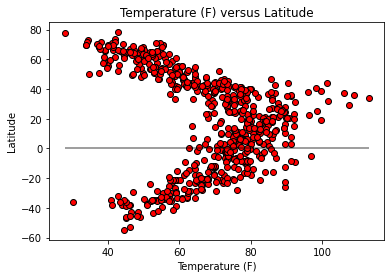

<Figure size 432x288 with 0 Axes>

In [90]:
x_axis = citydata_df["Temp (F)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="red")

plt.title("Temperature (F) versus Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/temp_vs_lat.png")

### Temperature (F) versus Latitude
The trend shows that as locations get closer to the equator (Latitude = 0), the temperatures go up. As the locations go farther away from the equator, temperatures drop.

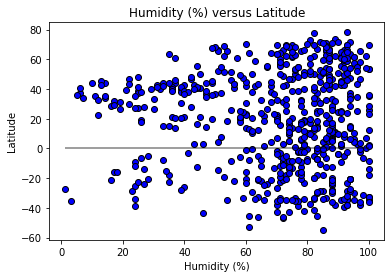

<Figure size 432x288 with 0 Axes>

In [93]:
x_axis = citydata_df["Humidity (%)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="blue")

plt.title("Humidity (%) versus Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/hum_vs_lat.png")

### Humidity (%) versus Latitude
There does not appear to be a strong correlation between the percent humidity and the latitude.

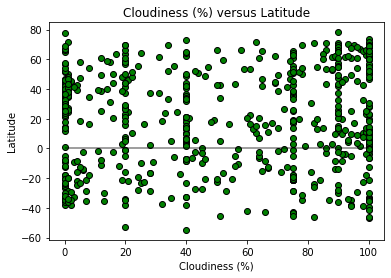

<Figure size 432x288 with 0 Axes>

In [95]:
x_axis = citydata_df["Cloudiness (%)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="green")

plt.title("Cloudiness (%) versus Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/cld_vs_lat.png")

### Cloudiness (%) versus Latitude

There does not appear to be a strong correlation between percent cloudiness and the latitude.

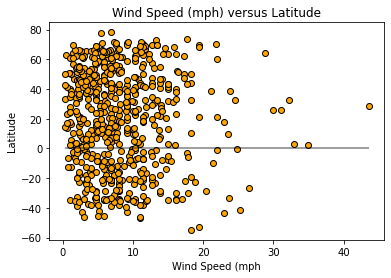

<Figure size 432x288 with 0 Axes>

In [97]:
x_axis = citydata_df["Wind Speed (mph)"]
y_axis = citydata_df["Lat"]

plt.scatter(x_axis,y_axis,edgecolors="black",color="orange")

plt.title("Wind Speed (mph) versus Latitude")
plt.xlabel("Wind Speed (mph")
plt.ylabel("Latitude")

plt.hlines(0,x_axis.min(),x_axis.max(),alpha=.5)

plt.show()
plt.savefig("Results/WeatherPy/ws_vs_lat.png")

### Wind Speed (mph) versus Latitude
There does not appear to be a correlation between wind speed and the latitude of the location.